In [ ]:
# Import TensorFlow 1.x version as tf
import tensorflow.compat.v1 as tf
# Disable TensorFlow 2.0 behavior to use TensorFlow 1.x features
tf.disable_v2_behavior()
# Import pandas library as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Import train_test_split function from sklearn.model_selection module
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

In [ ]:
# Read data from CSV file named harmonicData.csv and create a dataframe named harmonic_data
harmonic_data = pd.read_csv("/content/harmonicData.csv")

In [ ]:
# Display the first five rows of the harmonic_data dataframe
harmonic_data.head()

,0. load current (full rectifier current),1. load current (half rectifier current),2. load current (pure resistive load current),DominantLoadType,Alh 1. Harmonic,Alh 2. Harmonic,Alh 3. Harmonic,Alh 4. Harmonic,Alh 5. Harmonic,Alh 6. Harmonic,...,lh 22. Harmonic,lh 23. Harmonic,lh 24. Harmonic,lh 25. Harmonic,lrms,cf,dpf,pf,thdi,Output
0,0.067073,0.510490,0.524590,2. load current (pure resistive load current),-88.420,-140.37,146.48,79.866,4.9243,-58.426,...,0.005983,0.003789,0.005006,0.002821,0.58249,1.7168,0.99968,0.98640,101.35,2
1,0.062794,0.103450,0.855170,2. load current (pure resistive load current),-89.567,-140.29,141.44,79.862,-3.8956,-58.435,...,0.001276,0.001126,0.001069,0.000877,0.92841,1.0771,0.99999,0.99914,100.05,2
2,0.866950,0.023764,0.056992,0. load current (full rectifier current),-79.658,-140.21,135.14,80.215,-14.2540,-57.743,...,0.000313,0.027339,0.000263,0.025492,0.30893,3.2369,0.98414,0.62053,161.10,0
3,0.093905,0.614830,0.396590,1. load current (half rectifier current),-87.604,-140.37,146.09,79.866,4.2415,-58.425,...,0.007217,0.004289,0.006038,0.003038,0.47118,2.1223,0.99921,0.96877,103.19,1
4,0.499380,0.465750,0.065625,0. load current (full rectifier current),-79.872,-140.37,139.47,79.876,-7.1791,-58.406,...,0.005629,0.011332,0.004709,0.010147,0.25515,3.9193,0.98479,0.68290,146.39,0


# Harmonic Classification ANN

**Kodda ki ANN, tek katmanlı, feedforward, sigmoid aktivasyonlu, gradyan inişi optimizasyonlu, tam bağlantılı bir ağdır.**

Burada, verileri öznitelikler ve etiketler olarak ayırıp x_data ve y_data değişkenlerine atıyoruz. Verileri işlemek için pandas kütüphanesini kullanıyoruz. Son sütun hariç tüm sütunları öznitelikler olarak seçip x_data’ya atıyoruz. Verileri indeks ile dilimlemek için iloc metodunu kullanıyoruz. Ayrıca x_data’nın ilk beş satırını göstermek için head metodunu kullanıyoruz. Çıktıda, yük akımının harmonik bileşenlerinin değerlerini içeren 59 sütunlu ve 5 satırlı bir veri çerçevesi görüyoruz.

In [ ]:
# Split the data into features and labels and assign them to x_data and y_data variables
x_data = harmonic_data.iloc[:,:-1]
x_data.head()

,0. load current (full rectifier current),1. load current (half rectifier current),2. load current (pure resistive load current),DominantLoadType,Alh 1. Harmonic,Alh 2. Harmonic,Alh 3. Harmonic,Alh 4. Harmonic,Alh 5. Harmonic,Alh 6. Harmonic,...,lh 21. Harmonic,lh 22. Harmonic,lh 23. Harmonic,lh 24. Harmonic,lh 25. Harmonic,lrms,cf,dpf,pf,thdi
0,0.067073,0.510490,0.524590,2. load current (pure resistive load current),-88.420,-140.37,146.48,79.866,4.9243,-58.426,...,0.005246,0.005983,0.003789,0.005006,0.002821,0.58249,1.7168,0.99968,0.98640,101.35
1,0.062794,0.103450,0.855170,2. load current (pure resistive load current),-89.567,-140.29,141.44,79.862,-3.8956,-58.435,...,0.001415,0.001276,0.001126,0.001069,0.000877,0.92841,1.0771,0.99999,0.99914,100.05
2,0.866950,0.023764,0.056992,0. load current (full rectifier current),-79.658,-140.21,135.14,80.215,-14.2540,-57.743,...,0.027876,0.000313,0.027339,0.000263,0.025492,0.30893,3.2369,0.98414,0.62053,161.10
3,0.093905,0.614830,0.396590,1. load current (half rectifier current),-87.604,-140.37,146.09,79.866,4.2415,-58.425,...,0.006134,0.007217,0.004289,0.006038,0.003038,0.47118,2.1223,0.99921,0.96877,103.19
4,0.499380,0.465750,0.065625,0. load current (full rectifier current),-79.872,-140.37,139.47,79.876,-7.1791,-58.406,...,0.012203,0.005629,0.011332,0.004709,0.010147,0.25515,3.9193,0.98479,0.68290,146.39


Burada, verileri öznitelikler ve etiketler olarak ayırıp x_data ve y_data değişkenlerine atıyoruz. Verileri işlemek için pandas kütüphanesini kullanıyoruz. Sadece son sütunu etiketler olarak seçip y_data’ya atıyoruz. Verileri indeks ile dilimlemek için iloc metodunu kullanıyoruz. Ayrıca y_data’nın ilk beş satırını göstermek için head metodunu kullanıyoruz. Çıktıda, yük akımının dominant tipinin değerlerini içeren 1 sütunlu ve 5 satırlı bir veri çerçevesi görüyoruz. Sütun Output olarak adlandırılmıştır. Değerler 0, 1 veya 2 olabilir. 0 tam doğrultucu akım, 1 yarım doğrultucu akım, 2 saf dirençli yük akımı anlamına gelir.

In [ ]:
y_data = harmonic_data.iloc[:,-1:]
y_data.head()

,Output
0,2
1,2
2,0
3,1
4,0


Burada, öznitelik ve etiket verilerinin şeklini yazdırıyoruz. Verilerin satır ve sütun sayısını almak için shape özelliğini kullanıyoruz. Ayrıca sonuçları göstermek için print fonksiyonunu kullanıyoruz. Çıktıda, öznitelik verilerinin 1000 satır ve 59 sütun, etiket verilerinin 1000 satır ve 1 sütun olduğu görülüyor. Bu, 59 harmonik bileşeni öznitelik ve 1 dominant tipi etiket olarak içeren 1000 adet yük akımı verisi örneğiniz olduğu anlamına gelir.

In [ ]:
# Print the shape of the feature and label data
print("Feature Data :", x_data.shape)
print("Label Data :", y_data.shape)

Feature Data : (1000, 59)
Label Data : (1000, 1)


Burada, verileri eğitim ve test kümelerine ayırıyoruz. Test kümesinin büyüklüğünü 0.3, rastgele durumunu 42, ve y_data’ya göre tabakalı örnekleme yaparak bölüyoruz. Bölme işlemi için sklearn kütüphanesinden train_test_split fonksiyonunu kullanıyoruz. Girdi verileri olarak x_data ve y_data’yı, test kümesinin oranı olarak test_size’ı, rastgele sayı üretecinin tohumu olarak random_state’i, tabakalı örnekleme için kullanılacak dizi olarak stratify’i veriyoruz. Fonksiyonun çıktısını dört değişkene atıyorsunuz: train_x, test_x, train_y, test_y. Bunlar sırasıyla eğitim ve test kümelerinin öznitelik ve etiket verileridir. Ayrıca eğitim ve test kümelerinin şeklini shape özelliği ve print fonksiyonu kullanarak yazdırıyorsunuz. Çıktıda, eğitim verilerinin 700 satır ve 59 sütun, test verilerinin 300 satır ve 59 sütun olduğu görülüyor. Bu, verileri %70 eğitim ve %30 test kümelerine ayırdığımız, aynı zamanda her iki kümede de dominant yük tiplerinin oranını koruduğumuz anlamına gelir.



In [ ]:
# Split the data into train and test sets with a test size of 0.3, a random state of 42, and a stratified sampling based on y_data
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.3, random_state=42, stratify=y_data)
# Print the shape of the train and test sets
print("Training Data has",train_x.shape)
print("Testing Data has",test_x.shape)

Training Data has (700, 59)
Testing Data has (300, 59)


Burada, eğitim ve test kümelerinden DominantLoadType sütununu çıkarıp train_name ve test_name değişkenlerine atıyoruz. Verileri işlemek için pandas kütüphanesini kullanıyoruz. train_x ve test_x veri çerçevelerinden DominantLoadType sütununu seçip train_name ve test_name’e atıyoruz. Sütuna ismiyle erişmek için köşeli parantez gösterimini kullanıyoruz.

Ayrıca eğitim ve test kümelerinden yük akımı sütunlarını çıkarıp train_name_load1, train_name_load2, train_name_load3, test_name_load1, test_name_load2, test_name_load3 değişkenlerine atıyoruz. Yukarıdaki yöntemi kullanarak, train_x ve test_x veri çerçevelerinden 0. yük akımı (tam doğrultucu akım), 1. yük akımı (yarım doğrultucu akım) ve 2. yük akımı (saf dirençli yük akımı) adlı sütunları seçip ilgili değişkenlere atıyoruz.

Sonra train ve test kümelerinden DominantLoadType ve yük akımı sütunlarını atıp train_x ve test_x değişkenlerine atıyoruz. Verileri indeks ile dilimlemek için iloc metodunu kullanıyoruz. Dördüncü sütundan itibaren tüm sütunları öznitelikler olarak seçip train_x ve test_x’e atıyoruz. Orijinal train_x ve test_x veri çerçevelerini yenileriyle değiştiriyoruz.

Ayrıca eğitim ve test kümelerinin şeklini shape özelliği ve print fonksiyonu kullanarak yazdırıyoruz. Çıktıda, eğitim verilerinin 700 satır ve 55 sütun, test verilerinin 300 satır ve 55 sütun olduğu görülüyor. Orijinal verilerden ilk dört sütunu attık ki bunlar sınıflandırma görevi için ilgili olmayan sütunlardır. Öznitelik sayısını 59’dan 55’ye indirdik.

In [ ]:
# Extract the DominantLoadType column from the train and test sets and assign them to train_name and test_name variables
train_name = train_x['DominantLoadType']
test_name = test_x['DominantLoadType']

# Extract the load current columns from the train and test sets and assign them to train_name_load1,
# train_name_load2, train_name_load3, test_name_load1, test_name_load2, test_name_load3 variables
train_name_load1 = train_x['0. load current (full rectifier current)']
train_name_load2 = train_x['1. load current (half rectifier current)']
train_name_load3 = train_x['2. load current (pure resistive load current)']

test_name_load1 = test_x['0. load current (full rectifier current)']
test_name_load2 = test_x['1. load current (half rectifier current)']
test_name_load3 = test_x['2. load current (pure resistive load current)']

# Drop the DominantLoadType and load current columns from the train and test sets and assign them to train_x and test_x variables
train_x = train_x.iloc[:,4:]
test_x = test_x.iloc[:,4:]
# Print the shape of the train and test sets
print("Training Data has",train_x.shape)
print("Testing Data has",test_x.shape)

Training Data has (700, 55)
Testing Data has (300, 55)


Burada, girdi ve çıktı verileri için uygun şekillerde yer tutucular oluşturuyoruz. Hesaplama grafiğini oluşturmak ve işlemek için TensorFlow kütüphanesini kullanıyoruz. Girdi ve çıktı verilerini tutacak düğümler oluşturmak için placeholder fonksiyonunu kullanıyoruz. Fonksiyona veri tipi ve şekil olarak argümanlar veriyoruz. Fonksiyonun çıktısını iki değişkene atıyoruz: X ve Y. Bunlar sırasıyla öznitelik ve etiket verileri için yer tutuculardır. Veri tipini öznitelik verileri için tf.float32, etiket verileri için tf.int32 olarak belirliyoruz. Şekli öznitelik verileri için [None, 55], etiket verileri için [None, 1] olarak belirliyoruz. Bu, her biri 55 öznitelik ve 1 etikete sahip istediğiniz sayıda (None) örnek besleyebileceğimiz anlamına gelir.

In [ ]:
# Create placeholders for the input and output data with the appropriate shapes
X = tf.placeholder(tf.float32, [None,55])
Y = tf.placeholder(tf.int32, [None, 1])

Burada, çıktı verilerine bir-hot kodlama uygulayıp, sınıf sayısına uygun şekilde yeniden şekillendiriyoruz. TensorFlow kütüphanesini kullanarak hesaplama grafiğini oluşturuyor ve işliyoruz. Çıktı verilerini bir-hot kodlamak için tf.one_hot fonksiyonunu kullanıyoruz. Fonksiyona etiket verileri olan Y ve sınıf sayısı olan 3 argümanlarını veriyoruz. Fonksiyonun çıktısını Y_one_hot değişkenine atıyoruz. Bu, her bir etiketi 3 elemanlı bir vektöre dönüştüren bir tensördür. Örneğin, 0 etiketi [1, 0, 0], 1 etiketi [0, 1, 0], 2 etiketi [0, 0, 1] olarak kodlanır.

Bir-hot kodlanmış verileri sınıf sayısına uygun şekilde yeniden şekillendirmek için tf.reshape fonksiyonunu kullanıyoruz. Fonksiyona bir-hot kodlanmış veriler olan Y_one_hot ve yeni şekil olarak [-1, 3] argümanlarını veriyoruz. Fonksiyonun çıktısını Y_one_hot değişkenine tekrar atıyoruz. Bu, bir-hot kodlanmış verileri, istediğiniz sayıda (None) satır ve 3 sütun olarak yeniden şekillendiren bir tensördür. Bu, çıktı verilerinin sınıf sayısıyla aynı boyutta olmasını sağlar.

In [ ]:
# Perform one-hot encoding on the output data and reshape it to match the number of classes
Y_one_hot = tf.one_hot(Y, 3)  # one hot encoding
Y_one_hot = tf.reshape(Y_one_hot, [-1, 3])

Burada, ağırlık ve eşik değişkenlerini rastgele normal değerlerle ve 0 tohumuyla başlatıyoruz. TensorFlow kütüphanesini kullanarak hesaplama grafiğini oluşturuyor ve işliyoruz. Ağırlık ve eşik değişkenlerini oluşturmak için tf.Variable fonksiyonunu kullanıyoruz. Fonksiyona rastgele normal değerler üreten tf.random_normal fonksiyonunun çıktısını ve değişkenin adını argüman olarak veriyoruz. Ayrıca tf.random_normal fonksiyonuna veri tipi, şekil ve tohum olarak argümanlar veriyoruz. Fonksiyonun çıktısını W ve b değişkenlerine atıyoruz. Bunlar sırasıyla ağırlık ve eşik değişkenleridir. Veri tipini tf.float32 olarak belirliyoruz. Şekli öznitelik sayısı (55) ve sınıf sayısı (3) ile uyumlu olacak şekilde [55, 3] olarak belirliyoruz. Tohumu 0 olarak belirliyoruz. Bu, rastgele değerlerin üretimini tekrarlanabilir kılar. Değişkenlerin adını ‘weight’ ve ‘bias’ olarak belirliyoruz. Bu, grafiği incelemek veya kaydetmek için yararlıdır.

In [ ]:
# Initialize the weight and bias variables with random normal values and a seed of 0
W = tf.Variable(tf.random_normal([55, 3],seed=0), name='weight')
b = tf.Variable(tf.random_normal([3],seed=0), name='bias')

Burada, girdi verilerini ağırlıkla çarpıp eşik ekleyerek logitleri hesaplıyoruz. TensorFlow kütüphanesini kullanarak hesaplama grafiğini oluşturuyor ve işliyoruz. Logitleri hesaplamak için tf.matmul fonksiyonunu kullanıyoruz. Fonksiyona girdi verileri olan X ve ağırlık değişkeni olan W argümanlarını veriyoruz. Fonksiyonun çıktısı, X ve W’nin matris çarpımı olan bir tensördür. Bu tensöre eşik değişkeni olan b’yi ekliyoruz. Fonksiyonun çıktısını logitler değişkenine atıyoruz. Bu, her bir girdi örneği için sınıf olasılıklarını temsil eden bir tensördür. Logitler, hipotez oluşturmak için softmax fonksiyonuna girdi olarak verilecektir.

In [ ]:
# Compute the logits by multiplying the input data with the weight and adding the bias
logits = tf.matmul(X, W) + b

Burada, logitlere softmax fonksiyonu uygulayarak hipotezi hesaplıyoruz. TensorFlow kütüphanesini kullanarak hesaplama grafiğini oluşturuyor ve işliyoruz. Hipotezi hesaplamak için tf.nn.softmax fonksiyonunu kullanıyoruz. Fonksiyona logitler değişkenini argüman olarak veriyoruz. Fonksiyonun çıktısı, logitlerin her birine eksponansiyel fonksiyon uygulayıp toplamına bölerek oluşturulan bir tensördür. Bu, her bir girdi örneği için sınıf olasılıklarının normalize edilmiş halidir. Hipotez, maliyeti hesaplamak için etiket verileriyle karşılaştırılacaktır.

Maliyeti hesaplamak için logitler ve etiket verileri arasındaki softmax çapraz entropi kullanıyoruz. TensorFlow kütüphanesini kullanarak hesaplama grafiğini oluşturuyor ve işliyoruz. Maliyeti hesaplamak için tf.nn.softmax_cross_entropy_with_logits_v2 fonksiyonunu kullanıyoruz. Fonksiyona logitler değişkeni ve bir-hot kodlanmış etiket verileri olan Y_one_hot argümanlarını veriyoruz. Fonksiyonun çıktısı, her bir girdi örneği için softmax çapraz entropi değerini içeren bir tensördür. Bu, hipotez ile etiket verileri arasındaki uyumsuzluğu ölçer. Maliyeti, tüm örnekler üzerinden ortalamasını alarak hesaplıyoruz. TensorFlow kütüphanesini kullanarak hesaplama grafiğini oluşturuyor ve işliyoruz. Maliyeti hesaplamak için tf.reduce_mean fonksiyonunu kullanıyoruz. Fonksiyona softmax çapraz entropi değerlerini içeren cost_i değişkenini argüman olarak veriyoruz. Fonksiyonun çıktısı, tüm örneklerin softmax çapraz entropi değerlerinin ortalaması olan bir tensördür. Maliyet, eğitim işlemi sırasında en küçüklenmeye çalışılacaktır.

Ayrıca, alternatif bir maliyet hesaplama yöntemi olarak, hipotez ile etiket verilerinin logaritmik çarpımının negatif toplamını alarak maliyeti hesaplayabileceğinizi belirtiyoruz. Ancak bu yöntemi yorum satırı olarak bırakıyoruz, çünkü logitler ve etiket verileri arasındaki softmax çapraz entropi kullanmak daha verimli ve kararlıdır.

In [ ]:
# Compute the hypothesis by applying softmax function on the logits
hypothesis = tf.nn.softmax(logits)

# Compute the cost by using softmax cross entropy with logits and taking the mean over all examples
cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)
# cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis)))

Burada, gradyan inişi optimizasyonu kullanarak 0.01 öğrenme oranıyla ve maliyeti en küçükleyerek bir eğitim işlemi oluşturuyoruz. TensorFlow kütüphanesini kullanarak hesaplama grafiğini oluşturuyor ve işliyorsunuz. Eğitim işlemi oluşturmak için tf.train.GradientDescentOptimizer fonksiyonunu kullanıyoruz. Fonksiyona öğrenme oranı olarak 0.01 argümanını veriyoruz. Fonksiyonun çıktısı, gradyan inişi optimizasyonu yapan bir nesnedir. Bu nesnenin minimize metoduyla maliyet değişkenini argüman olarak vererek eğitim işlemini tanımlıyoruz. Metodun çıktısını train değişkenine atıyoruz. Bu, maliyeti en küçükleyecek şekilde ağırlık ve eşik değişkenlerini güncelleyen bir tensördür. Eğitim işlemi, oturum içinde eğitim verileriyle çalıştırılacaktır.

Ayrıca, alternatif bir eğitim işlemi oluşturma yöntemi olarak, Adam optimizasyonu kullanarak 0.01 öğrenme oranıyla ve maliyeti en küçükleyerek bir eğitim işlemi oluşturabileceğimizi belirtiyoruz. Ancak bu yöntemi yorum satırı olarak bırakıyorsunuz, çünkü gradyan inişi optimizasyonu kullanmak daha basit ve anlaşılırdır.

In [ ]:
# Create a train operation by using gradient descent optimizer with a learning rate of 0.01 and minimizing the cost
train  = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

Burada, hipotezin ikinci ekseni üzerinde argmax alarak tahmini hesaplıyoruz. TensorFlow kütüphanesini kullanarak hesaplama grafiğini oluşturuyor ve işliyoruz. Tahmini hesaplamak için tf.argmax fonksiyonunu kullanıyoruz. Fonksiyona hipotez değişkeni ve ikinci eksen olarak 1 argümanlarını veriyoruz. Fonksiyonun çıktısı, her bir girdi örneği için hipotezin en büyük değerine sahip olan sınıfın indeksini içeren bir tensördür. Tahmin, etiket verileriyle karşılaştırılarak doğruluk hesaplanacaktır.

Tahmin ile bir-hot kodlanmış çıktının ikinci ekseni üzerinde argmax alınarak doğru tahmini hesaplıyoruz. TensorFlow kütüphanesini kullanarak hesaplama grafiğini oluşturuyor ve işliyoruz. Doğru tahmini hesaplamak için tf.equal fonksiyonunu kullanıyoruz. Fonksiyona tahmin değişkeni ve bir-hot kodlanmış etiket verilerinin ikinci eksen üzerinde argmax alınmış hali olan tf.argmax(Y_one_hot, 1) argümanlarını veriyoruz. Fonksiyonun çıktısı, tahmin ile etiket verilerinin eşit olup olmadığını gösteren bir tensördür. Doğru tahmin, doğruluk hesaplamak için kullanılacaktır.

Doğru tahmin değerlerinin ortalaması alınarak doğruluğu hesaplıyoruz. TensorFlow kütüphanesini kullanarak hesaplama grafiğini oluşturuyor ve işliyoruz. Doğruluğu hesaplamak için tf.reduce_mean fonksiyonunu kullanıyoruz. Fonksiyona doğru tahmin değerlerini tf.float32 tipine dönüştüren tf.cast(correct_prediction, tf.float32) argümanını veriyoruz. Fonksiyonun çıktısı, tüm örneklerin doğru tahmin değerlerinin ortalaması olan bir tensördür. Doğruluk, eğitim ve test verileriyle değerlendirilecektir.

In [ ]:
# Compute the prediction by taking the argmax of the hypothesis over the second axis
prediction = tf.argmax(hypothesis, 1)
# Compute the correct_prediction by comparing the prediction with the argmax of the one-hot encoded output over the second axis
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
# Compute the accuracy by taking the mean over all the correct_prediction values
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Burada, bir oturum oluşturup tüm değişkenleri başlatıyoruz. TensorFlow kütüphanesini kullanarak hesaplama grafiğini oluşturuyor ve işliyoruz. Oturum oluşturmak için tf.Session fonksiyonunu kullanıyoruz. Fonksiyonun çıktısı, grafiği çalıştırmak için kullanılan bir nesnedir. Bu nesneyi with ifadesiyle sess adlı bir değişkene atıyoruz. Bu, oturumun sonunda otomatik olarak kapanmasını sağlar. Tüm değişkenleri başlatmak için tf.global_variables_initializer fonksiyonunu kullanıyoruz. Fonksiyonun çıktısı, tüm değişkenleri rastgele değerlerle dolduran bir tensördür. Bu tensörü sess.run metoduyla çalıştırıyoruz. Bu, ağırlık ve eşik değişkenlerini rastgele normal değerlerle başlatır.

35001 adım boyunca döngü kurup 1'er arttırarak eğitim işlemini çalıştırıyoruz. TensorFlow kütüphanesini kullanarak hesaplama grafiğini oluşturuyor ve işliyoruz. Döngü kurmak için range fonksiyonunu kullanıyoruz. Fonksiyona 35001 argümanını veriyoruz. Fonksiyonun çıktısı, 0'dan 35000'e kadar olan sayıları içeren bir aralıktır. Bu aralığı for ifadesiyle step adlı bir değişkene atıyoruz. Bu, her bir adım için eğitim işlemini çalıştırmak için kullanılacaktır. Eğitim işlemini çalıştırmak için sess.run metoduyla train tensörünü çalıştırıyoruz. Metoda girdi verileri olarak train_x ve train_y verilerini içeren bir sözlük veriyoruz. Bu, maliyeti en küçükleyecek şekilde ağırlık ve eşik değişkenlerini günceller.

Her 1000 adımda, adım, kayıp ve doğruluk değerlerini yazdırıyoruz. TensorFlow kütüphanesini kullanarak hesaplama grafiğini oluşturuyor ve işliyoruz. Her 1000 adımda bir işlem yapmak için if ifadesi ve mod alma operatörü (%) kullanıyoruz. Ifadesi, step değişkeninin 1000'e bölümünden kalanın 0 olup olmadığını kontrol eder. Eğer 0 ise, ifade doğru olur ve içindeki kod bloğu çalıştırılır. Kod bloğunda, sess.run metoduyla maliyet ve doğruluk tensörlerini çalıştırıyoruz. Metoda girdi verileri olarak train_x ve train_y verilerini içeren bir sözlük veriyoruz. Metodun çıktısı, maliyet ve doğruluk değerlerini içeren bir liste olur. Bu listeyi loss ve acc adlı değişkenlere atıyoruz. Bu, eğitim verileri üzerinde modelin performansını ölçer. Maliyet, eğitim işlemi sırasında azalmalıdır. Doğruluk, eğitim işlemi sırasında artmalıdır. Maliyet ve doğruluk değerlerini yazdırmak için print fonksiyonunu kullanıyoruz. Fonksiyona adım, kayıp ve doğruluk değerlerini ve bunların biçimlendirilmesini içeren bir metin veriyoruz. Fonksiyonun çıktısı, ekrana adım, kayıp ve doğruluk değerlerini yazdıran bir metindir.

Eğitim verileri ile doğruluk işlemini çalıştırıp train_acc değişkenine atıyoruz. TensorFlow kütüphanesini kullanarak hesaplama grafiğini oluşturuyor ve işliyoruz. Doğruluk işlemini çalıştırmak için sess.run metoduyla doğruluk tensörünü çalıştırıyoruz. Metoda girdi verileri olarak train_x ve train_y verilerini içeren bir sözlük veriyoruz. Metodun çıktısı, eğitim verileri üzerinde modelin doğruluk oranı olan bir sayıdır. Bu sayıyı train_acc değişkenine atıyoruz. Bu, modelin eğitim verilerini ne kadar iyi öğrendiğini gösterir.

Test verileri ile doğruluk, tahmin ve doğru tahmin işlemlerini çalıştırıp test_acc, test_predict ve test_correct değişkenlerine atıyoruz. TensorFlow kütüphanesini kullanarak hesaplama grafiğini oluşturuyor ve işliyoruz. Doğruluk, tahmin ve doğru tahmin işlemlerini çalıştırmak için sess.run metoduyla doğruluk, tahmin ve doğru tahmin tensörlerini çalıştırıyoruz. Metoda girdi verileri olarak test_x ve test_y verilerini içeren bir sözlük veriyoruz. Metodun çıktısı, doğruluk, tahmin ve doğru tahmin değerlerini içeren bir liste olur. Bu listeyi test_acc, test_predict ve test_correct adlı değişkenlere atıyoruz. Bu, test verileri üzerinde modelin performansını ölçer. Doğruluk, test verileri üzerinde modelin doğruluk oranıdır. Tahmin, test verileri için modelin tahmin ettiği sınıf indeksleridir. Doğru tahmin, tahmin ile etiket verilerinin eşit olup olmadığını gösteren değerlerdir.

Modelin tahminini ve test tahminini yazdırıyoruz. TensorFlow kütüphanesini kullanarak hesaplama grafiğini oluşturuyor ve işliyoruz. Tahmin değerlerini yazdırmak için print fonksiyonunu kullanıyoruz. Fonksiyona modelin tahminini içeren eğitim_acc ve test tahminini içeren test_acc değişkenlerini ve bunların biçimlendirilmesini içeren bir metin veriyoruz. Fonksiyonun çıktısı, ekrana modelin tahminini ve test tahminini yazdıran bir metindir. Bu, modelin eğitim ve test verileri üzerinde ne kadar başarılı olduğunu gösterir.

In [ ]:
# Create a session and initialize the global variables
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Loop over 35001 steps with an increment of 1
    for step in range(35001):
        # Run the train operation with the train_x and train_y data as feed_dict
        sess.run(train, feed_dict={X: train_x, Y: train_y})
        # Every 1000 steps, print the step, loss, and accuracy values by running the cost
        # and accuracy operations with the train_x and train_y data as feed_dict
        if step % 1000 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

    # Run the accuracy operation with the train_x and train_y data as feed_dict and assign it to train_acc variable
    train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
    # Run the accuracy, prediction, and correct_prediction operations with the test_x and test_y data as
    # feed_dict and assign them to test_acc, test_predict, and test_correct variables
    test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
    # Print the model prediction and test prediction values
    print("Model Prediction =", train_acc)
    print("Test Prediction =", test_acc)

annTrainScore = train_acc
annTestScore = test_acc

Step:     0	Loss: 772.112	Acc: 45.00%
Step:  1000	Loss: 311.578	Acc: 56.57%
Step:  2000	Loss: 357.437	Acc: 58.71%
Step:  3000	Loss: 336.035	Acc: 61.14%
Step:  4000	Loss: 316.802	Acc: 62.14%
Step:  5000	Loss: 303.273	Acc: 61.57%
Step:  6000	Loss: 295.386	Acc: 62.29%
Step:  7000	Loss: 250.626	Acc: 64.29%
Step:  8000	Loss: 234.437	Acc: 64.86%
Step:  9000	Loss: 138.036	Acc: 70.14%
Step: 10000	Loss: 49.924	Acc: 79.14%
Step: 11000	Loss: 36.992	Acc: 82.14%
Step: 12000	Loss: 45.139	Acc: 80.86%
Step: 13000	Loss: 120.604	Acc: 73.00%
Step: 14000	Loss: 85.646	Acc: 74.00%
Step: 15000	Loss: 41.268	Acc: 81.86%
Step: 16000	Loss: 54.551	Acc: 78.57%
Step: 17000	Loss: 43.872	Acc: 81.71%
Step: 18000	Loss: 50.725	Acc: 79.71%
Step: 19000	Loss: 37.560	Acc: 83.14%
Step: 20000	Loss: 21.759	Acc: 87.57%
Step: 21000	Loss: 19.100	Acc: 88.00%
Step: 22000	Loss: 19.125	Acc: 87.86%
Step: 23000	Loss: 19.684	Acc: 87.71%
Step: 24000	Loss: 18.546	Acc: 88.14%
Step: 25000	Loss: 15.813	Acc: 89.00%
Step: 26000	Loss: 17.209	Ac

Burada, sub adında bir veri çerçevesi oluşturup test_name_load1, test_name_load2, test_name_load3, test_name, test_predict, test_y ve test_correct sütunlarını atıyorsunuz. Verileri işlemek için pandas kütüphanesini kullanıyoruz. Veri çerçevesi oluşturmak için pd.DataFrame fonksiyonunu kullanıyoruz. Fonksiyonun çıktısı, boş bir veri çerçevesi olan bir nesnedir. Bu nesneyi sub adlı bir değişkene atıyoruz. Bu, test verileri için tahmin sonuçlarını içeren bir veri çerçevesi oluşturmak için kullanılacaktır.

Veri çerçevesine test_name_load1, test_name_load2, test_name_load3, test_name, test_predict, test_y ve test_correct sütunlarını atıyoruz. Verileri işlemek için pandas kütüphanesini kullanıyoruz. Veri çerçevesine sütun atamak için köşeli parantez gösterimini kullanıyoruz. Köşeli parantezlerin içine sütunun adını veriyoruz. Eşittir işaretinin sağ tarafına ise sütunun değerlerini veriyoruz. Sütunun değerleri olarak test_name_load1, test_name_load2, test_name_load3, test_name, test_predict, test_y ve test_correct değişkenlerini veriyoruz. Bu değişkenler, test verilerinin yük akımı, dominant yük tipi, tahmin edilen sınıf, orijinal sınıf ve doğru tahmin değerlerini içerir.

Veri çerçevesini gösteriyoruz. Verileri işlemek için pandas kütüphanesini kullanıyoruz. Veri çerçevesini göstermek için sub değişkenini yazıyoruz. Bu, veri çerçevesinin içeriğini ekrana yazdırır. Çıktıda, 300 satır ve 7 sütunlu bir veri çerçevesi görülüyor. Sütunlar 0. yük akımı (tam doğrultucu akım), 1. yük akımı (yarım doğrultucu akım), 2. yük akımı (saf dirençli yük akımı), DominantLoadType, Predict_Type, Origin_Type ve Correct olarak adlandırılmıştır. Değerler, test verilerinin yük akımı, dominant yük tipi, tahmin edilen sınıf, orijinal sınıf ve doğru tahmin değerleridir. Bu, test verileri için modelin tahmin sonuçlarını karşılaştırmak için kullanılabilir.

In [ ]:
# Create a dataframe called sub and assign the test_name_load1, test_name_load2, test_name_load3,
# test_name, test_predict, test_y, and test_correct columns to it
sub = pd.DataFrame()
sub['0. load current (full rectifier current)'] = test_name_load1
sub['1. load current (half rectifier current)'] = test_name_load2
sub['2. load current (pure resistive load current)'] = test_name_load3

sub['DominantLoadType'] = test_name
sub['Predict_Type'] = test_predict
sub['Origin_Type'] = test_y
sub['Correct'] = test_correct

# Display the sub dataframe
sub

,0. load current (full rectifier current),1. load current (half rectifier current),2. load current (pure resistive load current),DominantLoadType,Predict_Type,Origin_Type,Correct
677,0.247760,0.122330,0.654040,2. load current (pure resistive load current),2,2,True
907,0.332940,0.264470,0.541910,2. load current (pure resistive load current),2,2,True
562,0.554000,0.220560,0.341000,0. load current (full rectifier current),0,0,True
635,0.252070,0.712180,0.073691,1. load current (half rectifier current),1,1,True
273,0.371170,0.305930,0.415020,2. load current (pure resistive load current),2,2,True
...,...,...,...,...,...,...,...
647,0.428760,0.564890,0.100990,1. load current (half rectifier current),1,1,True
993,0.082799,0.513220,0.418220,1. load current (half rectifier current),1,1,True
855,0.550590,0.053300,0.517150,0. load current (full rectifier current),0,0,True
838,0.642760,0.056816,0.270960,0. load current (full rectifier current),0,0,True


Burada, sub veri çerçevesini yük akımı, DominantLoadType ve Predict_Type sütunlarıyla birlikte submission.csv adlı bir CSV dosyası olarak kaydediyoruz. Verileri işlemek için pandas kütüphanesini kullanıyoruz. Veri çerçevesini kaydetmek için to_csv metoduyla sub değişkenini çalıştırıyoruz. Metoda kaydedilecek sütunları içeren bir liste, dosyanın adı ve indeks oluşturulup oluşturulmayacağı argümanlarını veriyoruz. Sütunlar olarak 0. yük akımı (tam doğrultucu akım), 1. yük akımı (yarım doğrultucu akım), 2. yük akımı (saf dirençli yük akımı), DominantLoadType ve Predict_Type değişkenlerini veriyoruz. Dosyanın adı olarak submission.csv veriyoruz. İndeks oluşturulmaması için index=False veriyoruz. Bu, veri çerçevesinin yük akımı, dominant yük tipi ve tahmin edilen sınıf değerlerini içeren bir CSV dosyası olarak kaydedilmesini sağlar. Bu, modelin tahmin sonuçlarını başka bir platformda paylaşmak veya değerlendirmek için kullanılabilir.

In [ ]:
# Save the sub dataframe with the load current, DominantLoadType, and Predict_Type columns as a CSV file named submission.csv
sub[['0. load current (full rectifier current)',
     '1. load current (half rectifier current)',
     '2. load current (pure resistive load current)',
     'DominantLoadType','Predict_Type']].to_csv('submissionANN.csv',index=False)

Kodda kullanılan YSA'nın detayları şöyledir:

- YSA, 55 girdi düğümü, 3 çıktı düğümü ve gizli katmanı olmayan tek katmanlı bir ağ yapısıdır. Girdi düğümleri, yük akımının harmonik bileşenlerini temsil eder. Çıktı düğümleri, yük akımının dominant tipini temsil eder. Gizli katman, girdi ve çıktı arasında ara işlem yapmayan bir katmandır.
- YSA, eğitim verileriyle eğitilerek, ağırlık ve eşik değerlerini optimize eder. Ağırlık ve eşik değerleri, girdi verilerini işleyerek, logitler adı verilen sınıf olasılıklarını üretir. Logitler, softmax fonksiyonu ile normalize edilerek, hipotez adı verilen sınıf olasılıklarına dönüştürülür. Hipotez, etiket verileriyle karşılaştırılarak, maliyet adı verilen bir kayıp fonksiyonu hesaplanır. Maliyet, eğitim işlemi sırasında en küçüklenmeye çalışılır.
- YSA, gradyan inişi optimizasyonu adı verilen bir algoritma ile eğitilir. Gradyan inişi optimizasyonu, maliyet fonksiyonunun gradyanını hesaplayarak, ağırlık ve eşik değerlerini günceller. Gradyan inişi optimizasyonu, öğrenme oranı adı verilen bir parametre ile çalışır. Öğrenme oranı, ağırlık ve eşik değerlerinin ne kadar hızlı güncelleneceğini belirler. Öğrenme oranı çok büyük olursa, maliyet fonksiyonu osilasyon yapabilir. Öğrenme oranı çok küçük olursa, maliyet fonksiyonu çok yavaş azalabilir. Öğrenme oranı, deneme-yanılma yöntemiyle belirlenir. Yukarıda ki kodda, öğrenme oranı 0.01 olarak belirlenmiştir.
- YSA, tahmin etmek için hipotezin ikinci ekseni üzerinde argmax fonksiyonunu kullanır. Argmax fonksiyonu, bir vektörün en büyük değerine sahip olan indeksini döndüren bir fonksiyondur. Hipotezin ikinci ekseni üzerinde argmax almak, her bir girdi örneği için hipotezin en büyük değerine sahip olan sınıfın indeksini döndürür. Tahmin, etiket verileriyle karşılaştırılarak, doğruluk adı verilen bir performans ölçütü hesaplanır. Doğruluk, tahmin ile etiket verilerinin eşit olup olmadığını gösteren değerlerin ortalamasıdır. Doğruluk, eğitim ve test verileriyle değerlendirilir. Eğitim verileriyle değerlendirilen doğruluk, modelin eğitim verilerini ne kadar iyi öğrendiğini gösterir. Test verileriyle değerlendirilen doğruluk, modelin test verilerini ne kadar iyi tahmin ettiğini gösterir.

# Harmonic Classification SVM

In [ ]:
# Split the data into features and labels and assign them to x_data and y_data variables
x_data = harmonic_data.iloc[:,:-1]
x_data.head()

,0. load current (full rectifier current),1. load current (half rectifier current),2. load current (pure resistive load current),DominantLoadType,Alh 1. Harmonic,Alh 2. Harmonic,Alh 3. Harmonic,Alh 4. Harmonic,Alh 5. Harmonic,Alh 6. Harmonic,...,lh 21. Harmonic,lh 22. Harmonic,lh 23. Harmonic,lh 24. Harmonic,lh 25. Harmonic,lrms,cf,dpf,pf,thdi
0,0.067073,0.510490,0.524590,2. load current (pure resistive load current),-88.420,-140.37,146.48,79.866,4.9243,-58.426,...,0.005246,0.005983,0.003789,0.005006,0.002821,0.58249,1.7168,0.99968,0.98640,101.35
1,0.062794,0.103450,0.855170,2. load current (pure resistive load current),-89.567,-140.29,141.44,79.862,-3.8956,-58.435,...,0.001415,0.001276,0.001126,0.001069,0.000877,0.92841,1.0771,0.99999,0.99914,100.05
2,0.866950,0.023764,0.056992,0. load current (full rectifier current),-79.658,-140.21,135.14,80.215,-14.2540,-57.743,...,0.027876,0.000313,0.027339,0.000263,0.025492,0.30893,3.2369,0.98414,0.62053,161.10
3,0.093905,0.614830,0.396590,1. load current (half rectifier current),-87.604,-140.37,146.09,79.866,4.2415,-58.425,...,0.006134,0.007217,0.004289,0.006038,0.003038,0.47118,2.1223,0.99921,0.96877,103.19
4,0.499380,0.465750,0.065625,0. load current (full rectifier current),-79.872,-140.37,139.47,79.876,-7.1791,-58.406,...,0.012203,0.005629,0.011332,0.004709,0.010147,0.25515,3.9193,0.98479,0.68290,146.39


In [ ]:
y_data = harmonic_data.iloc[:,-1:]
y_data.head()

,Output
0,2
1,2
2,0
3,1
4,0


In [ ]:
# Print the shape of the feature and label data
print("Feature Data :", x_data.shape)
print("Label Data :", y_data.shape)

Feature Data : (1000, 59)
Label Data : (1000, 1)


In [ ]:
# Split the data into train and test sets with a test size of 0.3, a random state of 42, and a stratified sampling based on y_data
X_train, X_test, Y_train_label, Y_test_label = train_test_split(x_data, y_data, test_size=0.3, random_state=42, stratify=y_data)
# Print the shape of the train and test sets
print("Training Data has",X_train.shape)
print("Testing Data has",X_test.shape)

Training Data has (700, 59)
Testing Data has (300, 59)


In [ ]:
# Extract the DominantLoadType column from the train and test sets and assign them to train_name and test_name variables
train_name = X_train['DominantLoadType']
test_name = X_test['DominantLoadType']

# Extract the load current columns from the train and test sets and assign them to train_name_load1,
# train_name_load2, train_name_load3, test_name_load1, test_name_load2, test_name_load3 variables
train_name_load1 = X_train['0. load current (full rectifier current)']
train_name_load2 = X_train['1. load current (half rectifier current)']
train_name_load3 = X_train['2. load current (pure resistive load current)']

test_name_load1 = X_test['0. load current (full rectifier current)']
test_name_load2 = X_test['1. load current (half rectifier current)']
test_name_load3 = X_test['2. load current (pure resistive load current)']

# Drop the DominantLoadType and load current columns from the train and test sets and assign them to train_x and test_x variables
X_train = X_train.iloc[:,4:]
X_test = X_test.iloc[:,4:]
# Print the shape of the train and test sets
print("Training Data has",X_train.shape)
print("Testing Data has",X_test.shape)

Training Data has (700, 55)
Testing Data has (300, 55)


In [ ]:
# Transforming non numerical labels into numerical labels
encoder = preprocessing.LabelEncoder()

# encoding train labels
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)

# encoding test labels
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)
#list(set(X_train.columns) - set(num_cols))

names_of_predictors = list(X_train.columns.values)

# Scaling the Train and Test feature set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Number of numeric features: 55


In [ ]:
#Libraries to Build Ensemble Model : Random Forest Classifier
# Create the parameter grid based on the results of random search
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
               {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
# Performing CV to tune parameters for best SVM fit
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [ ]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n")

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n")
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

Best score for training data: 0.9928571428571429 

Best C: 10 

Best Kernel: linear 

Best Gamma: scale 



In [ ]:
# Making the Confusion Matrix
print(confusion_matrix(Y_test_label,Y_pred_label))
print("\n")
print(classification_report(Y_test_label,Y_pred_label))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , Y_test ))

svmTrainScore = final_model.score(X_train_scaled , Y_train)
svmTestScore = final_model.score(X_test_scaled  , Y_test )

[[ 70   1   0]
 [  0  93   1]
 [  1   2 132]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.97      0.99      0.98        94
           2       0.99      0.98      0.99       135

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

Training set score for SVM: 0.997143
Testing  set score for SVM: 0.983333


# Model Evaluation

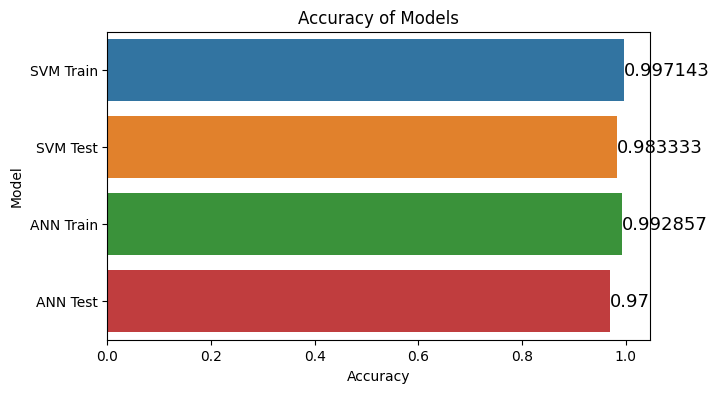

In [ ]:
ScoreList = [svmTrainScore, svmTestScore, annTrainScore, annTestScore]

# Create dataframe with mean accuracy scores for each model
results = pd.DataFrame({"Score":ScoreList,
                        "Model":["SVM Train",
                                 "SVM Test",
                                 "ANN Train",
                                 "ANN Test"]})

# Visualize number of target values in dataset
plt.figure(figsize=(7,4))

ax = sns.barplot(results, x="Score", y="Model")
ax.bar_label(ax.containers[0], fontsize=13);

plt.title("Accuracy of Models")
plt.xlabel("Accuracy")
plt.ylabel("Model")

# Display plots
plt.show()